Importing dependencies

In [348]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import seaborn as sns


Importing Data

In [349]:
#Set options
pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:20,.2f}'.format
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (11, 4)

#import data
raw_data = pd.read_csv('BC_LCG_2017_CN.csv', dayfirst=True, parse_dates=[0])
additional_info_1 = pd.read_excel(r'BC_LCG_2017_CN.xlsb', sheet_name='IA1', index_col=0)
additional_info_2 = pd.read_excel(r'BC_LCG_2017_CN.xlsb', sheet_name='IA2',index_col=0)

In [350]:
#checking data
cleaned = raw_data
cleaned.dropna(how='all', axis=0, inplace=True)
cleaned.head()

,Fecha,Número de Vendedor,Unnamed: 2,Nom_Completo_Vendedor,Número de cliente,Tipo,Departamento - Clave,Departamento,Familia - Clave,Familia,Ventas Netas (Q),Costo,Unnamed: 12,Unnamed: 13
0,2015-01-01,7.00,NaN,NaN,66.00,Real,21.00,NaN,328.00,TRATAMIENTO DE CONCRETO,"31,740.12","22,046.54",NaN,NaN
1,2015-01-01,5.00,NaN,NaN,45.00,Real,21.00,NaN,370.00,PINTURAS DECORATIVAS,"2,377.30","1,761.35",NaN,NaN
2,2015-01-01,8.00,NaN,NaN,75.00,Real,NaN,Pinturas,371.00,BARNICES ARQUITECTÓNICOS,"20,422.48","13,189.05",NaN,NaN
3,2015-01-01,6.00,NaN,NaN,57.00,Real,21.00,NaN,372.00,PINTURA AUTOMOTRIZ,719.80,668.40,NaN,NaN
4,2015-01-01,7.00,NaN,NaN,62.00,Real,21.00,NaN,376.00,TINTES PARA MADERA,"15,589.78","10,835.03",NaN,NaN


In [351]:
#creating dict for additional info
add_inf_dict1 = {}
for a,b in additional_info_1.iterrows():
    add_inf_dict1[b.name] = b.Departamento

add_inf_dict1_inverse = {v: k for k, v in add_inf_dict1.items()}
print(add_inf_dict1)
print(add_inf_dict1_inverse)

add_inf_dict2 = {}
for a,b in additional_info_2.iterrows():
    add_inf_dict2[b.name] = b.Nombre + ' ' + b.Apellido

{15: 'Alfombras', 806: 'Artículos Impulso', 7: 'Artículos Navideños', 25: 'Automotriz', 8: 'Baños', 11: 'Bebes', 2: 'Blancos', 5: 'Cocina', 42: 'Cortinaje', 2250: 'Decoracion', 22: 'Eléctricos', 3: 'Electrodomésticos', 58: 'Electronica', 26: 'Ferretería', 2251: 'Guatemala nuestra', 23: 'Herramientas', 27: 'Jardinería', 1: 'Juguetes', 10: 'Lámparas', 12: 'Librería', 30: 'Limpieza', 2248: 'Mascotas', 50: 'Materiales de Construcción', 4: 'Mesa', 59: 'Muebles de Exterior', 2249: 'Muebles de Interior', 807: 'Niños', 9: 'Organización', 28: 'Out Door Living', 21: 'Pinturas', 24: 'Plomería', 2247: 'Seguridad'}
{'Alfombras': 15, 'Artículos Impulso': 806, 'Artículos Navideños': 7, 'Automotriz': 25, 'Baños': 8, 'Bebes': 11, 'Blancos': 2, 'Cocina': 5, 'Cortinaje': 42, 'Decoracion': 2250, 'Eléctricos': 22, 'Electrodomésticos': 3, 'Electronica': 58, 'Ferretería': 26, 'Guatemala nuestra': 2251, 'Herramientas': 23, 'Jardinería': 27, 'Juguetes': 1, 'Lámparas': 10, 'Librería': 12, 'Limpieza': 30, 'Masco

Adding missing data and droppig empty rows/columns

In [352]:
#seller names
seller_names = []
for code in cleaned['Número de Vendedor']:
    seller_names.append(add_inf_dict2[code])
cleaned['Nom_Completo_Vendedor'] = seller_names
cleaned.dropna(how='all', axis=1, inplace=True)
cleaned = cleaned.where(pd.notnull(cleaned), '0')
cleaned['Departamento - Clave'] = cleaned['Departamento - Clave'].astype('int')
cleaned.head()

,Fecha,Número de Vendedor,Nom_Completo_Vendedor,Número de cliente,Tipo,Departamento - Clave,Departamento,Familia - Clave,Familia,Ventas Netas (Q),Costo
0,2015-01-01,7,Carlos Vela,66,Real,21,0,328,TRATAMIENTO DE CONCRETO,"31,740.12","22,046.54"
1,2015-01-01,5,Gonzalo Aguilar,45,Real,21,0,370,PINTURAS DECORATIVAS,"2,377.30","1,761.35"
2,2015-01-01,8,Ernesto Pineda,75,Real,0,Pinturas,371,BARNICES ARQUITECTÓNICOS,"20,422.48","13,189.05"
3,2015-01-01,6,Paulina Casanova,57,Real,21,0,372,PINTURA AUTOMOTRIZ,719.80,668.40
4,2015-01-01,7,Carlos Vela,62,Real,21,0,376,TINTES PARA MADERA,"15,589.78","10,835.03"


In [353]:
#departmento
dept_codes = list(cleaned['Departamento - Clave'])
dept_names = list(cleaned['Departamento'])
dept_names_new = []
#print('Len codes: ',len(dept_codes))
#print('Len names: ',len(dept_names))

for i, row in enumerate(dept_codes):
    if row == 0:
        try: 
            dept_codes[i] = add_inf_dict1_inverse[dept_names[i]]
        except:
            print('Exception at Code index: ', i, row)
            dept_codes[i] = 'Inf. faltante'

for row in dept_codes:
    if row == 'Inf. faltante':
        dept_names_new.append('Inf. faltante')
    else:
        dept_names_new.append(add_inf_dict1[row])

#print('Len codes: ',len(dept_codes))
#print('Len names: ',len(dept_names_new))

cleaned['Departamento - Clave'] = dept_codes
cleaned['Departamento'] = dept_names_new
cleaned['Ventas_USD'] = cleaned['Ventas Netas (Q)']/7.5
cleaned['Costo_USD'] = cleaned['Costo']/7.5
cleaned['Ganancias_USD'] = cleaned['Ventas_USD'] - cleaned['Costo_USD']
cleaned.head()

,Fecha,Número de Vendedor,Nom_Completo_Vendedor,Número de cliente,Tipo,Departamento - Clave,Departamento,Familia - Clave,Familia,Ventas Netas (Q),Costo,Ventas_USD,Costo_USD,Ganancias_USD
0,2015-01-01,7,Carlos Vela,66,Real,21,Pinturas,328,TRATAMIENTO DE CONCRETO,"31,740.12","22,046.54","4,232.02","2,939.54","1,292.48"
1,2015-01-01,5,Gonzalo Aguilar,45,Real,21,Pinturas,370,PINTURAS DECORATIVAS,"2,377.30","1,761.35",316.97,234.85,82.13
2,2015-01-01,8,Ernesto Pineda,75,Real,21,Pinturas,371,BARNICES ARQUITECTÓNICOS,"20,422.48","13,189.05","2,723.00","1,758.54",964.46
3,2015-01-01,6,Paulina Casanova,57,Real,21,Pinturas,372,PINTURA AUTOMOTRIZ,719.80,668.40,95.97,89.12,6.85
4,2015-01-01,7,Carlos Vela,62,Real,21,Pinturas,376,TINTES PARA MADERA,"15,589.78","10,835.03","2,078.64","1,444.67",633.97


PARETO ABC 

DEPARTAMENTOS

In [354]:
#Departamentos
#1.1 Crear Dataset de Departamentos
df_departamentos = cleaned.groupby('Departamento').agg(
    clientes = ('Número de cliente', 'nunique'),
    pedidos = ('Familia', 'nunique'),
    ingresos = ('Ventas_USD', 'sum'),
    ganancias = ('Ganancias_USD', 'sum'),
).reset_index()

df_departamentos.head()

,Departamento,clientes,pedidos,ingresos,ganancias
0,Alfombras,40,3,"3,382,987.11","1,729,639.42"
1,Artículos Impulso,41,4,"4,201,449.06","1,635,760.79"
2,Artículos Navideños,59,23,"7,772,727.44","3,997,732.89"
3,Automotriz,80,11,"10,472,857.66","3,994,262.15"
4,Baños,53,6,"12,903,730.01","6,218,372.94"


In [355]:
#1.2 Segmentación ABC
def abc(df, metric_column, abc_class_name='class'):
    """Asigna una clase ABC y ranking dentro de la clase de acuerdo con la metrica de contribución 
        al porcentaje cumulativo 
    
    Args:
        df: Pandas dataframe containing data. 
        metric_column (string): Name of column containing metric to calculate. 
        abc_class_name (string, optional): Name to assign to class column. 
    
    Return:
        Pandas dataframe containing original data, plus the metric class and rank. 
    """
    
    def _abc_segment(percentage):
        """Asigna una clase ABC de acuerdo con la metrica de contribución al porcentaje cumulativo 
        Args:
            percentage (float): Cumulative percentage of ranked metric.
        Returns:
            segments: Pandas DataFrame
        """

        if 0 < percentage <= 80:
            return 'A'
        elif 80 < percentage <= 90:
            return 'B'
        else:
            return 'C' 
    data = df.sort_values(by=metric_column, ascending=False)
    data[metric_column+'_sum'] = data[metric_column].sum()
    data[metric_column+'_cumsum'] = data[metric_column].cumsum()
    data[metric_column+'_running_pc'] = (data[metric_column+'_cumsum'] / data[metric_column+'_sum']) * 100
    data[abc_class_name] = data[metric_column+'_running_pc'].apply(_abc_segment)
    data[abc_class_name+'_rank'] = data[metric_column+'_running_pc'].rank().astype(int)
    data.drop([metric_column+'_sum', metric_column+'_cumsum', metric_column+'_running_pc'], axis=1, inplace=True)
    return data

df_departamento_segmentos = abc(df_departamentos, 'ingresos', 'pareto_abc')
df_departamento_segmentos.head()

,Departamento,clientes,pedidos,ingresos,ganancias,pareto_abc,pareto_abc_rank
17,Juguetes,80,28,"20,274,844.59","8,080,787.56",A,1
12,Eléctricos,83,15,"13,653,840.73","6,060,140.03",A,2
7,Cocina,84,18,"13,540,891.31","6,268,931.74",A,3
4,Baños,53,6,"12,903,730.01","6,218,372.94",A,4
10,Electrodomésticos,70,16,"12,539,779.33","4,766,885.59",A,5


In [356]:
#1.3 Analysis ABC para examinar los segmentos
df_resumen_abc_departamentos = df_departamento_segmentos.groupby('pareto_abc').agg(
    departamentos = ('Departamento', 'nunique'),
    pedidos = ('pedidos', 'sum'),
    ingresos = ('ingresos', 'sum'),
    ganancias = ('ganancias', 'sum'),
).reset_index()

df_resumen_abc_departamentos.head()


,pareto_abc,departamentos,pedidos,ingresos,ganancias
0,A,18,262,"184,530,954.91","77,521,031.81"
1,B,5,89,"26,639,366.45","11,659,704.24"
2,C,9,50,"23,582,028.68","10,722,938.41"


CLIENTES

In [357]:
#Departamentos
#2.1 Crear Dataset de Clientes
df_clientes = cleaned.groupby('Número de cliente').agg(
    cliente = ('Número de cliente', 'nunique'),
    pedidos = ('Familia', 'nunique'),
    ingresos = ('Ventas_USD', 'sum'),
    ganancias = ('Ganancias_USD', 'sum'),
).reset_index()

df_clientes.head()

,Número de cliente,cliente,pedidos,ingresos,ganancias
0,1,1,62,"2,726,283.87","1,151,872.49"
1,2,1,54,"1,953,236.54","778,842.68"
2,3,1,56,"1,468,666.56","601,176.17"
3,4,1,50,"1,321,047.86","563,615.86"
4,5,1,52,"1,467,000.73","615,561.38"


In [358]:
#2.2 Segmentación ABC
df_cliente_segmentos = abc(df_clientes, 'ingresos', 'pareto_abc')
df_cliente_segmentos.head()

,Número de cliente,cliente,pedidos,ingresos,ganancias,pareto_abc,pareto_abc_rank
46,47,1,283,"20,530,094.33","8,314,814.64",A,1
13,14,1,273,"19,963,858.34","8,940,207.06",A,2
58,59,1,296,"19,198,607.44","8,321,570.14",A,3
67,68,1,292,"18,611,336.47","8,172,306.51",A,4
73,74,1,284,"16,949,299.52","7,147,048.04",A,5


In [359]:
#2.3 Analysis ABC para examinar los segmentos
df_resumen_abc_clientes = df_cliente_segmentos.groupby('pareto_abc').agg(
    clientes = ('cliente', 'nunique'),
    pedidos = ('pedidos', 'sum'),
    ingresos = ('ingresos', 'sum'),
    ganancias = ('ganancias', 'sum'),
).reset_index()

df_resumen_abc_departamentos.head()

,pareto_abc,departamentos,pedidos,ingresos,ganancias
0,A,18,262,"184,530,954.91","77,521,031.81"
1,B,5,89,"26,639,366.45","11,659,704.24"
2,C,9,50,"23,582,028.68","10,722,938.41"


VENDEDORES

In [360]:
#3.1 Tabla de resumen de ventas por vendedor
df_vendedores = cleaned.groupby('Nom_Completo_Vendedor').agg(
    cliente = ('Número de cliente', 'nunique'),
    pedidos = ('Familia', 'nunique'),
    ingresos = ('Ventas_USD', 'sum'),
    ganancias = ('Ganancias_USD', 'sum'),
).reset_index()
df_vendedores = df_vendedores.sort_values('ingresos', ascending=False)
df_vendedores['Porcentajes_ventas'] = df_vendedores['ingresos']/df_vendedores['ingresos'].sum()
df_vendedores['Porcentajes_clientes'] = df_vendedores['cliente']/df_vendedores['cliente'].sum()
df_vendedores['Porcentajes_pedidos'] = df_vendedores['pedidos']/df_vendedores['pedidos'].sum()

df_vendedores



,Nom_Completo_Vendedor,cliente,pedidos,ingresos,ganancias,Porcentajes_ventas,Porcentajes_clientes,Porcentajes_pedidos
3,Juan Garza,87,366,"126,053,855.59","53,692,083.69",0.54,0.55,0.18
1,Ernesto Pineda,16,262,"27,277,862.38","11,569,402.83",0.12,0.10,0.13
2,Gonzalo Aguilar,9,251,"15,621,483.76","6,721,964.72",0.07,0.06,0.13
7,Sofia Gonzalez,10,257,"15,238,778.79","6,472,645.19",0.06,0.06,0.13
0,Carlos Vela,9,220,"14,234,057.78","6,133,075.64",0.06,0.06,0.11
5,Paulina Casanova,9,215,"14,146,193.68","5,992,204.63",0.06,0.06,0.11
6,Pedro Arroyo,10,259,"13,928,986.07","6,053,357.49",0.06,0.06,0.13
4,Michelle Perez,9,177,"8,251,131.99","3,268,940.26",0.04,0.06,0.09


Analisis de Tendencia de Ventas

In [361]:
#Formato de fecha
cleaned['Fecha'] = pd.to_datetime(cleaned['Fecha'])
cleaned['AA'] = cleaned['Fecha'].dt.year
cleaned['MM'] = cleaned['Fecha'].dt.month
cleaned['DD']  = cleaned['Fecha'].dt.day
cleaned['Trimestre'] = pd.PeriodIndex(cleaned.Fecha, freq='Q')
cleaned.to_csv('new_data.csv')


In [362]:
#determinar años
years = [unique for unique in cleaned.AA.unique()]
print('no de años: ', len(years))


no de años:  2


In [410]:
df_resumen_ventas = cleaned.groupby(['AA', 'MM']).agg(
    ingresos = ('Ventas_USD', sum),
    gastos = ('Costo_USD', sum),
    cliente = ('Número de cliente', 'nunique'),
    pedidos = ('Familia', 'nunique'),
    ganancias = ('Ganancias_USD', 'sum'),
).reset_index()

df_resumen_ventas['rentabilidad'] = df_resumen_ventas['ganancias']/df_resumen_ventas['gastos']*100

df_resumen_ventas

,AA,MM,ingresos,gastos,cliente,pedidos,ganancias,rentabilidad
0,2015,1,"7,913,548.65","4,625,327.16",79,299,"3,288,221.49",71.09
1,2015,2,"7,084,395.69","4,027,786.50",79,296,"3,056,609.19",75.89
2,2015,3,"10,168,852.01","5,935,406.23",81,311,"4,233,445.77",71.33
3,2015,4,"7,634,221.78","4,466,282.52",80,289,"3,167,939.26",70.93
4,2015,5,"8,364,325.89","5,031,498.95",72,294,"3,332,826.95",66.24
5,2015,6,"8,756,595.63","5,101,248.69",71,291,"3,655,346.93",71.66
6,2015,7,"9,042,699.54","5,254,605.61",74,298,"3,788,093.93",72.09
7,2015,8,"8,193,745.90","4,720,765.27",79,298,"3,472,980.63",73.57
8,2015,9,"9,760,197.82","5,550,573.14",72,313,"4,209,624.68",75.84
9,2015,10,"8,124,340.31","4,380,957.77",75,311,"3,743,382.54",85.45


In [423]:
rentabilidad_sept_16 = df_resumen_ventas.iloc[20]['rentabilidad']
rentabilidad_sept_16

77.27577908892027

In [424]:
##max sales 2015
df_max=df_resumen_ventas.loc[df_resumen_ventas['ingresos'].idxmax()]
df_max.head()

AA                     2,015.00
MM                        12.00
ingresos          23,388,850.79
gastos            13,716,033.20
cliente                   81.00
Name: 11, dtype: float64

In [425]:
##max sales 2016
df_resumen_ventas16 = df_resumen_ventas[df_resumen_ventas['AA']== 2016]
df_max16=df_resumen_ventas16.loc[df_resumen_ventas16['ingresos'].idxmax()]
df_max16.head()

AA                     2,016.00
MM                        11.00
ingresos          16,960,601.28
gastos             9,707,644.00
cliente                   77.00
Name: 22, dtype: float64

In [426]:
##min sales 2015
df_resumen_ventas15 = df_resumen_ventas[df_resumen_ventas['AA']== 2015]
df_min15=df_resumen_ventas15.loc[df_resumen_ventas15['ingresos'].idxmin()]
df_min15.head()

AA                     2,015.00
MM                         2.00
ingresos           7,084,395.69
gastos             4,027,786.50
cliente                   79.00
Name: 1, dtype: float64

In [427]:
##min sales 2016
df_min=df_resumen_ventas.loc[df_resumen_ventas['ingresos'].idxmin()]
df_min.head()

AA                     2,016.00
MM                        12.00
ingresos           4,404,673.10
gastos             2,455,225.64
cliente                   73.00
Name: 23, dtype: float64

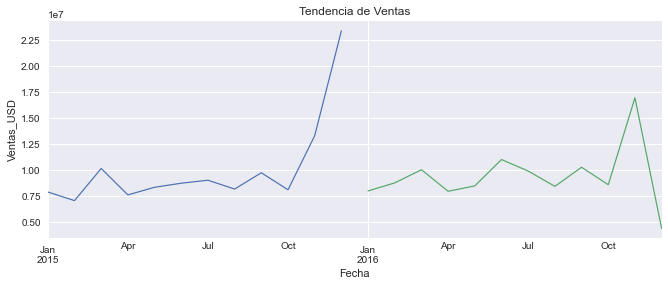

In [428]:
def plot_trend(years:list, df):
    for year in years:
        new_df = df[df['AA'] == year]
        new_df.groupby(['Fecha'])['Ventas_USD'].sum().plot(linewidth=1.2, 
                                             ylabel='Ventas_USD', 
                                             xlabel='Fecha', 
                                             title='Tendencia de Ventas');

year1 = plt.patches.Patch(color='blue', label='2015')
year2 = plt.patches.Patch(color='green', label='2016')
plot_trend(years,cleaned)
#plt.legend(handles=[year1,year2], loc=2)

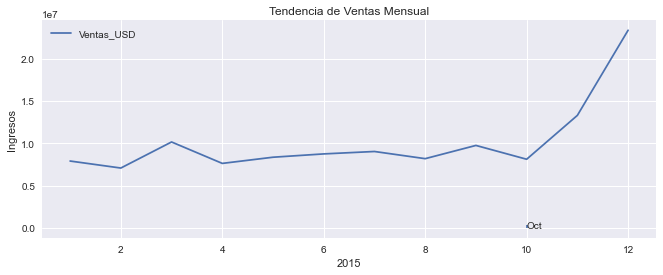

In [429]:
df_2015 = cleaned[cleaned['AA']==2015]
month_sales_15 = df_2015[['MM', 'Familia', 'Ventas_USD']].groupby('MM').sum().plot(
                                                                 title='Tendencia de Ventas Mensual', 
                                                                 ylabel='Ingresos',
                                                                 xlabel = 2015
                                                                 );
month_sales_15.vlines(10,1,300000, linestyles='dashed')
month_sales_15.annotate('Oct',(10,0));

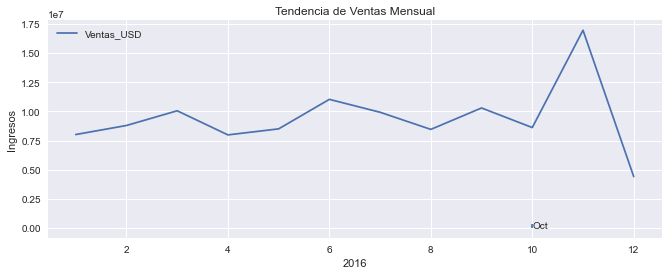

In [430]:
df_2016 = cleaned[cleaned['AA']==2016]
month_sales_16 = df_2016[['MM', 'Familia', 'Ventas_USD']].groupby('MM').sum().plot(
                                                                 title='Tendencia de Ventas Mensual', 
                                                                 ylabel='Ingresos',
                                                                 xlabel = 2016
                                                                 );
month_sales_16.vlines(10,1,300000, linestyles='dashed')
month_sales_16.annotate('Oct',(10,0));

In [431]:
#Crecimiento Anual
df_resumen_ventas_anual = cleaned.groupby(['AA']).agg(
    ingresos = ('Ventas_USD', sum),
    cliente = ('Número de cliente', 'nunique'),
    pedidos = ('Familia', 'nunique'),
    ganancias = ('Ganancias_USD', 'sum'),
).reset_index()
df_resumen_ventas_anual['Crecimiento_anual'] = df_resumen_ventas_anual['ganancias'].pct_change(periods=1) * 100

df_resumen_ventas_anual


,AA,ingresos,cliente,pedidos,ganancias,Crecimiento_anual
0,2015,"121,748,065.63",87,375,"51,324,639.46",NaN
1,2016,"113,004,284.41",87,378,"48,579,034.99",-5.35


In [432]:
#Clientes y rentabilidad
df_resumen_clientes_anual = cleaned.groupby(['AA', 'Número de cliente']).agg(
    ingresos = ('Ventas_USD', sum),
    pedidos = ('Familia', 'nunique'),
    ganancias = ('Ganancias_USD', sum),
).reset_index()

df_cliente_min=df_resumen_clientes_anual.loc[df_resumen_clientes_anual['ganancias'].idxmin()]
df_cliente_min.head()

AA                              2,015.00
Número de cliente                  17.00
ingresos                      227,724.04
pedidos                            15.00
ganancias                      97,067.17
Name: 16, dtype: float64

In [435]:
#Quarterly report
df_resumen_quarter = cleaned.groupby(['Trimestre']).agg(
    ingresos = ('Ventas_USD', sum),
    gastos = ('Costo_USD', sum),
    pedidos = ('Familia', 'nunique'),
    clientes = ('Número de cliente', 'nunique'),
    ganancias = ('Ganancias_USD', sum),
).reset_index()
df_resumen_quarter['rentabilidad'] = df_resumen_quarter['ganancias']/df_resumen_quarter['gastos']*100

df_resumen_quarter

,Trimestre,ingresos,gastos,pedidos,clientes,ganancias,rentabilidad
0,2015Q1,"25,166,796.34","14,588,519.89",352,87,"10,578,276.46",72.51
1,2015Q2,"24,755,143.30","14,599,030.16",337,87,"10,156,113.14",69.57
2,2015Q3,"26,996,643.26","15,525,944.03",347,86,"11,470,699.23",73.88
3,2015Q4,"44,829,482.72","25,709,932.09",353,87,"19,119,550.63",74.37
4,2016Q1,"26,850,722.19","15,215,115.49",347,87,"11,635,606.70",76.47
5,2016Q2,"27,509,834.59","16,370,369.38",348,85,"11,139,465.21",68.05
6,2016Q3,"28,667,152.33","15,912,703.66",357,87,"12,754,448.67",80.15
7,2016Q4,"29,976,575.29","16,927,060.89",360,87,"13,049,514.41",77.09


In [438]:
#trimestre con rentabilidad mas baja
df_quarter_min=df_resumen_quarter.loc[df_resumen_quarter['rentabilidad'].idxmin()]
df_quarter_min

Trimestre                    2016Q2
ingresos              27,509,834.59
gastos                16,370,369.38
pedidos                         348
clientes                         85
ganancias             11,139,465.21
rentabilidad                  68.05
Name: 5, dtype: object